<img src="https://numpy.org/_static/numpy_logo.png" width=50%>

- 本笔记参考[菜鸟教程-NumPy](https://www.runoob.com/numpy/numpy-tutorial.html)、[Quickstart tutorial](https://numpy.org/devdocs/user/quickstart.html)和[Numpy-Index](https://numpy.org/devdocs/genindex.html#) 

----

# Ndarray对象

NumPy最重要的⼀个特点就是其**N维数组对象（即ndarray）**，该对象是⼀个快速⽽灵活的⼤数据（同种类型）集容器

## ndarray基本属性

比如以下数组a（实际上是一个**嵌套序列（nested sequence）**，但假设它是NumPy构造的array），我们要找到最大数10，用下标表示就是`a[1][1][0]`；于是我们说这是一个三维数组，有三个**轴(axes)**，三轴长度依次为：2，2，4

NumPy 数组的维数称为**秩（rank）**，一维数组的秩为 1，二维数组的秩为 2，以此类推

In [22]:
a=[[[1,2,3,4],[7,8,9,2]],[[4,5,6,7],[10,1,2,3]]]

In [23]:
a[1][1][0]

10

要构造一个ndarray类对象，需要了解它最基本的属性:

|Attribute|Description|
|:----:|:--------------:|
|ndim|轴数，即维度，a.ndim=3|
|shape|一个表示数组形状的元组，其元素为各轴长度，a.shape=(2,2,4)
|size|表述数组内元素总个数，a.size=2*2*4=16|
|dtype|元素类型,包括一些特有类型，如numpy.int32\int64\float64|
|itemsize|单个元素的字节，如int32为4字节|
|data|储存实际元素的缓冲器(buffer)，非常用属性|
|real|ndarray实部|
|imag|ndarray虚部|

In [24]:
import numpy as np
b=np.array(a)# 有嵌套序列a创建一个ndarray b
# 下面看看b的各个属性
print(b,type(b),b.real,b.imag,sep='\n')

[[[ 1  2  3  4]
  [ 7  8  9  2]]

 [[ 4  5  6  7]
  [10  1  2  3]]]
<class 'numpy.ndarray'>
[[[ 1  2  3  4]
  [ 7  8  9  2]]

 [[ 4  5  6  7]
  [10  1  2  3]]]
[[[0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]]]


In [25]:
print(b.ndim,b.shape,b.size,b.dtype,b.itemsize,b.data,sep='\n')

3
(2, 2, 4)
16
int32
4


## **array**函数

创建一个 ndarray 只需调用 NumPy 的 array 函数即可，语法如下：

```Python
numpy.array(object, dtype = None, copy = True, order = None, subok = False, ndmin = 0)
```

参数说明如下：

|argument|Description|
|:----:|:--------------:|
|object|数组或嵌套的序列|
|dtype|同属性，可选|
|copy|对象是否需要复制，可选|
|order|创建数组的样式，C为行方向，F为列方向，A为任意方向（默认）|
|subok|默认返回一个与基类类型一致的数组|
|ndmin|指定生成数组的最小维度|

In [66]:
import numpy as np 
a = np.array([1,2,3,4,5], ndmin =  2) 
b = np.array([1,2,3], dtype = complex)
print(a,b,sep='\n')

[[1 2 3 4 5]]
[1.+0.j 2.+0.j 3.+0.j]


此外，`array`还有一个“简易版”`asarray`，其参数减少到3个：
```Python
np.asarray(a, dtype=None, order=None)
```

In [67]:
a1 = np.asarray([1,2,3,4,5]) 
b1 = np.asarray([1,2,3], dtype = complex)
print(a1,b1,sep='\n')

[1 2 3 4 5]
[1.+0.j 2.+0.j 3.+0.j]


----

# 数组类型 

numpy 支持的数据类型比 Python 内置的类型要多很多，基本上可以和 C 语言的数据类型对应上，其中部分类型对应为 Python 内置的类型。下表列举了常用 NumPy 基本类型：

|dtype|Description|sign|
|:----:|:--------------:|:----:|
|bool|布尔型，True/False|`b`|
|int*|有符号整型：8/16/32/64|`i1/2/4/8`|
|uint*|无符号整型：8/16/32/64|`u1/2/4/8`|
|float16|半精度浮点数，包括：1 个符号位，5 个指数位，10 个尾数位|`f2`|
|float32|半精度浮点数，包括：1 个符号位，8 个指数位，23 个尾数位|`f4`|
|float64|半精度浮点数，包括：1 个符号位，11 个指数位，52 个尾数位|`f8`|
|complex64|复数，表示双 32 位浮点数（实数部分和虚数部分）|`c8`|
|complex128|复数，表示双 64 位浮点数（实数部分和虚数部分）|`c16`|
|string|字符串|`S` or `a`|
|unicode||`U`|

numpy 的数值类型实际上是 dtype 对象的实例，并对应唯一的字符，包括 np.bool_，np.int32，np.float32，等等

## C结构体 

NumPy的底层语言是C语言，独有的数据类型是根据**结构体struct**来创建的，为了深入了解数据类型直到能自定义数据类型，有必要了解一些结构体的基础知识

C **数组**允许定义可存储**相同类型**数据项的变量，**结构**是 C 编程中另一种用户自定义的可用的数据类型，它允许存储**不同类型**的数据项，C结构体的语法如下：
```C
struct tag 
{ 
    member-list
    member-list 
    member-list  
    ...
} variable-list ;
```

- **`tag`** 是结构体标签
- **`member-list`** 是标准的变量定义，比如 int i; 或者 float f，或者其他有效的变量定义
- **`variable-list`** 结构变量声明，定义在结构的末尾，可以指定一个或多个结构变量


假设您想要跟踪图书馆中书本的动态，您可能需要跟踪每本书的几个重要属性——标题、作者、价格、ID:
```C
struct Books
{
   char  title[50];
   char  author[50];
   float price;
   int   book_id;
} book = {"C 语言", "RUNOOB", 25.50, 123456};
```

## numpy.dtype类 

array函数中的参数dtype，除了NumPy\Python内置的一些数据类型，也可以自己构造。构造的方法就是**实例化numpy.dtype对象**。这个类的原理是传入**待转换的数据类型obj**创造**dtype对象**，语法结构如下：
```Pyhton
class numpy.dtype(obj, align=False, copy=False)
```
`align`：填充字段使其类似 C 的**结构体**，只有当obj为字典或comma-separated string是，可选为true

`copy`：复制dtype对象 ，如果为 false，则是对内置数据类型对象的引用

In [11]:
import numpy as np
# 可以使用字符串符号代替
o=np.int16
d1=np.dtype(o)
d2=np.dtype('i2')
d1,d1.__class__,d2,d2.__class__,o.__class__

(dtype('int16'), numpy.dtype, dtype('int16'), numpy.dtype, type)

In [12]:
o=[('age', 'i1')]
d=np.dtype(o)
d,d.__class__,o.__class__

(dtype([('age', 'i1')]), numpy.dtype, list)

相当于C结构体中的：
```C
struct d
{
    int age;
};
```
下面我们把这个新建的数据类型d用到实际数组中：

In [21]:
a=np.array([15,16,17,18],dtype=d).reshape(2,2)
a

array([[(15,), (16,)],
       [(17,), (18,)]], dtype=[('age', 'i1')])

In [22]:
# 类型字段名可以用于存取实际的 age 列
a['age']

array([[15, 16],
       [17, 18]], dtype=int8)

再看一个复杂的例子，用C语言表示为：
```c
#include <stdio.h>
#include <string.h>

struct Student{
    char   name[20];
    int    age;
    float  marks;
};

int main()
{
    struct Student student1;       /* 声明student1  */
    struct Student student2;       /* 声明student2  */

    /* student1详述 */
    strcpy(student1.name,"Tony");
    student1.age=18;
    student1.marks=75.0;
    
    /* student1详述 */
    strcpy(student2.name,"Jack");
    student2.age=19;
    student2.marks=83.5;
    
    return 0;
}
```

In [29]:
Student=np.dtype([('name','U20'),('age','i1'),('marks','f2')])
student=np.array([[('Tony',18,75.0)],[('Jack',19,83.5)]],dtype=Student)
student,student.shape

(array([[('Tony', 18, 75. )],
        [('Jack', 19, 83.5)]],
       dtype=[('name', '<U20'), ('age', 'i1'), ('marks', '<f2')]), (2, 1))

In [30]:
student[0],student[1]

(array([('Tony', 18, 75.)],
       dtype=[('name', '<U20'), ('age', 'i1'), ('marks', '<f2')]),
 array([('Jack', 19, 83.5)],
       dtype=[('name', '<U20'), ('age', 'i1'), ('marks', '<f2')]))

In [31]:
student['name'],student[0]['name']

(array([['Tony'],
        ['Jack']], dtype='<U20'), array(['Tony'], dtype='<U20'))

## 字节顺序 

构造数据类型，还有一个值得重视的细节就是——**字节顺序**。字节顺序是通过对数据类型预先设定 **`<`** 或 **`>`** 来决定的。 **`<`** 意味着**小端法** ； **`>`** 意味着**大端法**

> **字节顺序**：在几乎所有的机器上，多字节对象都被存储为连续的字节序列。字节顺序，是跨越多字节的程序对象的存储规则
>
>**大端模式Big-Endian**：数据的高字节保存在内存的低地址中，而数据的低字节保存在内存的高地址中，符合一般阅读习惯
>
>**小端模式Little-Endian**：数据的高字节保存在内存的高地址中，而数据的低字节保存在内存的低地址中，这种存储模式将地址的高低和数据位权有效地结合起来，高地址部分权值高，低地址部分权值低

In [59]:
b=np.array([1,2,3])
b

array([1, 2, 3])

In [64]:
# byteswap()方法将 ndarray 中每个元素中的字节进行大小端转换
b.byteswap(True) #地址变换，数值自然也变化了

array([16777216, 33554432, 50331648])

## 副本和视图 

- **副本copy**：一个数据的完整的拷贝，如果我们对副本进行修改，它不会影响到原始数据，物理内存不在同一位置，一般发生在：
    - Python 序列的切片操作（相当于浅拷贝），调用**`copy.deepcopy()`** 函数
    - 调用 ndarray 的 copy() 函数产生一个副本
    
    
- **视图view**：数据的一个别称或引用，通过该别称或引用亦便可访问、操作原有数据，但原有数据不会产生拷贝。如果我们对视图进行修改，它会影响到原始数据，物理内存在同一位置，一般发生在：
    - numpy 的切片操作返回原数据的视图
    - 调用 ndarray 的 **`view()`**方法产生一个视图

### 命名绑定

类似于Python中的命名绑定、浅拷贝、深拷贝，NumPy数组同样具有这些区别，如以下对数组直接赋值就是名称绑定，属于视图操作。

In [26]:
import numpy as np
a=np.arange(6)
b=a
# 查看a,b的地址（16进制表示）
list(map(hex,list(map(id,[a,b]))))

['0x2008b3140d0', '0x2008b3140d0']

In [27]:
# b修改形状，a也会改变：
b.shape=(2,3)
a.shape,b.shape

((2, 3), (2, 3))

### 视图或浅拷贝 

**`ndarray.view()`** 方法会创建一个新的数组对象，该方法创建的新数组的维数更改**不会更改原始数据的维数**

In [28]:
b=a.view()
b.shape=(3,2)
a,b

(array([[0, 1, 2],
        [3, 4, 5]]), array([[0, 1],
        [2, 3],
        [4, 5]]))

In [29]:
# 地址也会发生变化
list(map(hex,list(map(id,[a,b]))))

['0x2008b3140d0', '0x2008b0a9f80']

In [31]:
# 但是对b的元素修改会反映到a的身上
b[2]=9
a,b

(array([[0, 1, 2],
        [3, 9, 9]]), array([[0, 1],
        [2, 3],
        [9, 9]]))

Python中的切片操作相当于浅拷贝，NumPy的切片操作也是一个浅拷贝，**可以改变数组维度，但不能改变数组元素**，即创建原数组的新视图

In [32]:
a=np.arange(6)
b=a[:]
b.shape=(2,3)
a.shape,b.shape

((6,), (2, 3))

In [34]:
b[1][1]=99
a,b

(array([ 0,  1,  2,  3, 99,  5]), array([[ 0,  1,  2],
        [ 3, 99,  5]]))

### 副本或深拷贝 

**`ndarray.copy()`** 方法创建一个副本。 对副本数据进行修改，不会影响到原始数据，它们物理内存不在同一位置

In [35]:
a=np.arange(6)
b=a.copy()
b.shape=(2,3)
b[1][1]=99
a,b

(array([0, 1, 2, 3, 4, 5]), array([[ 0,  1,  2],
        [ 3, 99,  5]]))

**<span style="color:red">在学习编辑数组的各种方法时需要留意它是视图操作还是副本操作</span>**

----

# 创建数组

前面我们介绍了**array**函数，除此之外，再介绍一些创建方法

## 特殊数组

### numpy.empty 

**numpy.empty** 方法用来创建一个指定形状（shape）、数据类型（dtype）且未初始化(数组元素将为**随机值**)的数组:

```Python
numpy.empty(shape, dtype = float, order = 'C')
```

***order***有"C"和"F"两个选项,分别代表，行优先和列优先，在计算机内存中的存储元素的顺序

In [51]:
import numpy as np 
E = np.empty((3,4), dtype =np.int16 ) 
E

array([[    0,     0,     0, 16368],
       [    0,     0,     0, 16384],
       [    0,     0,     0, 16392]], dtype=int16)

### numpy.zeros 

创建指定大小的数组，数组元素以 0 /False来填充：

In [52]:
Z=np.zeros((3,4), dtype =np.bool_ )
Z

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

### numpy.ones 

创建指定形状的数组，数组元素以 1 来填充：

In [53]:
O=np.ones((3,4), dtype =np.float64)
O

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

### numpy.eye

创建指定形状的**对角(diagonal)数组**，为什么用eye表示？因为通常我们用`I`表示单位阵，与eye谐音

```Python
np.eye(N, M=None, k=0, dtype=<class 'float'>, order='C')
```

这里的参数与前不同，N表示行；M表示列，默认为N，可选；k指的是对角线偏位值，如k=1,对角线右移1单位：

In [62]:
I=np.eye(3,5,1, dtype =int)
I

array([[0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]])

## 从已有的数组创建数组 

除了上文提到的**array**函数和**asarray**函数，我们还有别的选择

###  numpy.fromiter

numpy.fromiter 方法从可迭代对象(不仅限于**迭代器**)中建立 ndarray 对象，返回一维数组:
```Python
numpy.fromiter(iterable, dtype, count=-1)
```

***count***：读取的数据数量，默认为-1，读取所有数据

In [71]:
import numpy as np
# 利用iter函数创建一个itrator
it=iter([5,4,0,8,7])
x=np.fromiter(it, dtype=float)
x

array([5, 4, 0, 8, 7])

In [72]:
y=np.fromiter([5,4,0,8,7],dtype=int)
y

array([5, 4, 0, 8, 7])

## 从数值范围创建数组 

### numpy.arange 

创建一维数组，函数语法如下，类似于普通的`range`函数，start默认为0，stop不含自身：
```Python
numpy.arange(start, stop, step, dtype)
```

In [74]:
import numpy as np
x = np.arange(10,20,2)  
x

array([10, 12, 14, 16, 18])

### numpy.linspace

`arrange`是以**步长step**限定输出，而`linspace`以**个数num**规定输出：
```Python
np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
```
`endpoint`：该值为 ture 时，数列中中包含stop值，反之不包含

`restype`：如果为 True 时，将生成一个tuple，包含ndarray和step

In [87]:
x1 = np.linspace(10,20,5,endpoint=True,retstep=True)
x2 = np.linspace(10,20,5,endpoint=False)
print(x1,type(x1),sep='\n')
print(x2,type(x2),sep='\n')

(array([10. , 12.5, 15. , 17.5, 20. ]), 2.5)
<class 'tuple'>
[10. 12. 14. 16. 18.]
<class 'numpy.ndarray'>


### numpy.logspace 

创建一个等比数列，并以`底数base`求真值数组
```Python
np.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)
```
`start`与`stop`：一维数组的起点/终点为：base<sup>start/stop</sup>

In [88]:
a = np.logspace(0,9,10,base=2)
a

array([  1.,   2.,   4.,   8.,  16.,  32.,  64., 128., 256., 512.])

----

# 切片和索引 

## 普通切片与slice函数

ndarray对象的内容可以通过索引或切片来访问和修改，与 Python 中 list 的切片操作一样

In [91]:
import numpy as np
a = np.arange(10)
s1= a[5] #索引
s2= a[2:8:3] #切片
s1,s2

(5, array([2, 5]))

另外，**`slice`**函数可以将切片过程分别进行：

In [97]:
s3 = slice(5)#stop=5
s4 = slice(2,8,3) 
a[s3],a[s4]

(array([0, 1, 2, 3, 4]), array([2, 5]))

## 多维数组切片 

多维数组同样适用上述索引提取方法：

In [131]:
b=np.empty(shape=(3,2,4),dtype=np.int16)
b

array([[[     0,      0,      0,  16420],
        [-29789, -17874, -23832,  16423]],

       [[  5958,  29789,  17873,  16427],
        [-23832,  11915,  -5958,  16430]],

       [[  5958,  29789,  17873,  16433],
        [ 23831, -11916,   5957,  16435]]], dtype=int16)

In [132]:
b[2] #在0轴上索引,此时shape=(2,4),降一维

array([[  5958,  29789,  17873,  16433],
       [ 23831, -11916,   5957,  16435]], dtype=int16)

In [133]:
b[2,1] #继续在第1轴上索引,shape=(4,)，再降一维

array([ 23831, -11916,   5957,  16435], dtype=int16)

加上**`...`**可以表示在该轴上遍取，该轴的维度保留

In [141]:
b[...,3] #shape=(3,2)，保留前两轴，去掉2轴所在的维度

array([[16420, 16423],
       [16427, 16430],
       [16433, 16435]], dtype=int16)

In [135]:
b[1,...,1] #shape=(2,),只保留第1轴所在的维度

array([29789, 11915], dtype=int16)

----

# 高级索引 

## 整数数组索引

从下列可以看出，数组作为索引，相当于对每一个轴上的元素进行**压缩**，即：X\[ax1,ax2,ax3,\...]

In [208]:
import numpy as np
x = np.array([[  0,  1,  2],[  3,  4,  5],[  6,  7,  8],[  9,  10,  11]]) 
x

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [145]:
# 找到四个角点的两轴坐标，进行压缩：
x[[0,0,3,3],[0,2,0,2]]

array([ 0,  2,  9, 11])

In [150]:
# 还可以改变轴的shape,输出对应shape的索引值
axis0=np.array([[0,0],[3,3]])
axis1=[[0,2],[0,2]]
x[axis0,axis1]

array([[ 0,  2],
       [ 9, 11]])

同样，可以借助切片**`:`**或**`…`**与索引数组组合：

In [151]:
x[...,1:]

array([[ 1,  2],
       [ 4,  5],
       [ 7,  8],
       [10, 11]])

此外，还可以改变**索引顺序**或**倒序**：

In [215]:
print(x[[3,0,1,2]],x[[-1,-2,-3,-4]],sep='\n')

[[ 9 10 11]
 [ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]]
[[ 9 10 11]
 [ 6  7  8]
 [ 3  4  5]
 [ 0  1  2]]


## 布尔索引 

布尔索引通过布尔运算（**如：比较运算符**）来获取符合指定条件的元素的数组。如下例展示了一个构造**Boolean array**的方法：

```Ipython
>>>import numpy as np 
>>>x = np.arange(6).reshape(2,3)
>>>x
array([[0, 1, 2],
       [3, 4, 5]])
>>>y=x>3
>>>y #y是一个Boolean array
array([[False, False, False],
       [False,  True,  True]])
>>>x[y]
array([ 4,  5])
```

In [204]:
#构造一个包含NaN(not a number)的数组a，层层筛分出奇数元素
a = np.array([np.nan,1,2,np.nan,3,4,3+5j])
a

array([nan+0.j,  1.+0.j,  2.+0.j, nan+0.j,  3.+0.j,  4.+0.j,  3.+5.j])

In [205]:
#第一步。过滤掉NaN
b=~np.isnan(a)
a=a[b]
print(b,a,sep='\n')

[False  True  True False  True  True  True]
[1.+0.j 2.+0.j 3.+0.j 4.+0.j 3.+5.j]


In [206]:
#第二步，过滤掉虚部不为0的复数
a=a[~np.iscomplex(a)]
a

array([1.+0.j, 2.+0.j, 3.+0.j, 4.+0.j])

In [207]:
#第三步，过滤掉实部为偶数的复数
a=a[a.real%2!=0]
a

array([1.+0.j, 3.+0.j])

## **ix_()**函数

例如我们对一个矩阵进行**行列交换**运算，可以用到**`ix()_`**函数

In [2]:
import numpy as np 
x=np.arange(16).reshape((4,4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [3]:
# 对上面的矩阵先做行变换，再做列变换
x[np.ix_([0,2,3,1],[1,0,3,2])]

array([[ 1,  0,  3,  2],
       [ 9,  8, 11, 10],
       [13, 12, 15, 14],
       [ 5,  4,  7,  6]])

In [4]:
x[np.ix_([0,2],[1,3])]

array([[ 1,  3],
       [ 9, 11]])

我们来看看`ix_`函数究竟做了哪些事情？如下所示，`ix_`函数其实是将整数数组索引方法拆分成了**N个一维向量**，每个向量占据不同的维度：

In [6]:
y=np.ix_([0,2],[1,3])
y

(array([[0],
        [2]]), array([[1, 3]]))

In [7]:
y[0].shape,y[1].shape

((2, 1), (1, 2))

----

# 广播(Broadcast) 

广播(Broadcast)是 numpy 对不同形状(shape)的数组进行数值计算的方式， 对数组的算术运算通常在相应的元素上进行

如果两个数组 a 和 b 形状相同，即满足 a.shape == b.shape，那么 a*b 的结果就是 a 与 b 数组对应位相乘。这要求维数相同，且各维度的长度相同。

In [11]:
import numpy as np 
a = np.array([1,2,3,4]) 
b = np.array([10,20,30,40]) 
c = a * b 
c

array([ 10,  40,  90, 160])

若 2 个数组的形状不同时，numpy 将自动触发广播机制。如下例即时将b沿0轴扩展4倍：

In [12]:
a = np.array([[ 0, 0, 0],
           [10,10,10],
           [20,20,20],
           [30,30,30]])
b = np.array([1,2,3])
c = a+b
c

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

>***广播的规则:***
>- 让所有输入数组都向其中形状最长的数组看齐，形状中不足的部分都通过在前面加 1 补齐。
>- 输出数组的形状是输入数组形状的各个维度上的最大值。
>- 如果输入数组的某个维度和输出数组的对应维度的长度相同或者其长度为 1 时，这个数组能够用来计算，否则出错。
>- 当输入数组的某个维度的长度为 1 时，沿着此维度运算时都用此维度上的第一组值。

再举一个复杂的例子：

In [13]:
a = np.array([0,1])
b = np.array([0,1,2])
c = np.array([0,1,2,3])
ax,bx,cx = np.ix_(a,b,c)
ax.shape,bx.shape,cx.shape

((2, 1, 1), (1, 3, 1), (1, 1, 4))

In [18]:
abc_product=ax*bx*cx
abc_product,abc_product.shape

(array([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 1, 2, 3],
         [0, 2, 4, 6]]]), (2, 3, 4))

In [21]:
abc_sum=ax+bx+cx
abc_sum,abc_sum.shape

(array([[[0, 1, 2, 3],
         [1, 2, 3, 4],
         [2, 3, 4, 5]],
 
        [[1, 2, 3, 4],
         [2, 3, 4, 5],
         [3, 4, 5, 6]]]), (2, 3, 4))

----

# 迭代数组 

## 迭代器numpy.nditer 

**`numpy.nditer`**提供了一种灵活访问一个或者多个数组元素的方式，如下例：

In [46]:
import numpy as np
a = np.arange(6).reshape(2,3)
for x in np.nditer(a):
    print (x, end=", " )

0, 1, 2, 3, 4, 5, 

输出顺序是和数组内存布局一致的，这样做是为了提升访问的效率，默认是**行序优先**（row-major order，或者说是**C-order**）

此外，转置矩阵自动调整***order***为***F-order***

In [30]:
a.T 

array([[0, 3],
       [1, 4],
       [2, 5]])

In [31]:
for x in np.nditer(a):
    print (x, end=", " )

0, 1, 2, 3, 4, 5, 

In [32]:
b=np.array([[0, 3],
       [1, 4],
       [2, 5]])
for x in np.nditer(b):
    print (x, end=", " )

0, 3, 1, 4, 2, 5, 

我们也可以以**F-order**的方式**复制a**，在以列序优先方式输出：

In [33]:
for x in np.nditer(a.copy(order='F')):
    print (x, end=", " )

0, 3, 1, 4, 2, 5, 

##  控制遍历顺序-order参数

除了复制数组a，并改变排序方式之外，我们也可以直接在`nditer`迭代器里添加`order`参数

In [34]:
for x in np.nditer(a,order='F'):
    print (x, end=", " )

0, 3, 1, 4, 2, 5, 

##  修改数组中的元素-op_flags参数

`nditer` 对象有另一个可选参数 **`op_flags`**。 默认情况下，nditer 将视待迭代遍历的数组为**只读对象（read-only）**，为了在遍历数组的同时，实现对数组元素值得修改，必须指定**read-write  或者write-only** 的模式

In [49]:
a = np.arange(6).reshape(2,3)
for x in np.nditer(a,op_flags=('readwrite',)):
    #注意，op_flags参数很多，一般用元组表示
    print (x, end=", " )
    x*=2
a

0, 1, 2, 3, 4, 5, 

array([[ 0,  2,  4],
       [ 6,  8, 10]])

## 使用外部循环-flags参数

nditer类的构造器拥有`flags`参数，包括`external_loop`子参数：给出的值是具有多个值的一维数组，而不是零维数组

In [62]:
a = np.arange(24).reshape(2,3,4)
for x in np.nditer(a,flags =('external_loop',)):  
   print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


## 广播迭代

如果两个数组是可广播的，`nditer`能够同时迭代它们

In [67]:
a = np.array([0,1])
c = np.array([0,1,2,3])
ax,cx = np.ix_(a,c)
for i,j in np.nditer([ax,cx]):  
    print('{}:{}'.format(i,j),end=' , ')

0:0 , 0:1 , 0:2 , 0:3 , 1:0 , 1:1 , 1:2 , 1:3 , 

----

# 数组操作 

## 修改数组形状 

|函数/方法|描述|
|:----|:----|
|reshape|不改变数据的条件下修改形状|
|ndarray.flat|数组元素迭代器|
|ndarray.flatten|返回一份数组拷贝，对拷贝所做的修改不会影响原始数组|
|ravel|返回展开数组|

### numpy.reshape 

```Python
numpy.reshape(ndarray, newshape, order='C')
```

### numpy.ndarray.flat

前述介绍过迭代器`numpy.nditer`，与此类似，`flat`也是对元素迭代，当然，由于它**not callable**，作用远不及前者：

In [71]:
a = np.arange(6).reshape(2,3)
for x in a.flat:
    print(x,end=',')

0,1,2,3,4,5,

### numpy.ndarray.flatten

`flatten`将多维数组**展平**为一维向量，不过仅是生成一份拷贝，不会对原数组影响：

In [87]:
a.flatten(order='F')

array([0, 3, 1, 4, 2, 5])

### numpy.ravel

同样是展平成一维向量：

In [89]:
np.ravel(a,order='F')

array([0, 3, 1, 4, 2, 5])

## 翻转数组

|函数/方法|描述|
|:----:|:----:|
|transpose|对调维度，即转置|
|ndarray.T|同上，转置矩阵|
|rollaxis|向后滚动指定的轴|
|swapaxes|对换数组的两个轴|

### numpy.transpose 

In [97]:
a=np.arange(24).reshape(1,2,3,4)
np.transpose(a).shape

(4, 3, 2, 1)

In [98]:
a.T.shape

(4, 3, 2, 1)

### numpy.rollaxis

`numpy.rollaxis`函数向后滚动特定的轴到一个特定位置，格式如下：
```Python
numpy.rollaxis(arr, axis, start)
```
`start`：默认为零，表示完整的滚动。会滚动到特定位置

In [100]:
a = np.arange(8).reshape(2,2,2)
a

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

将2轴移到0轴，原0轴、1轴依次后退：

In [101]:
np.rollaxis(a,2)

array([[[0, 2],
        [4, 6]],

       [[1, 3],
        [5, 7]]])

移轴是如何完成的呢？默认C-order下,原数组中“3”的坐标为:(0,1,1),移轴后坐标为：(1,0,1)，即换到了原来的“5”位置

### numpy.swapaxis

`numpy.swapaxes `函数用于交换数组的两个轴，格式如下：
```Python
numpy.swapaxes(arr, axis1, axis2)
```

In [102]:
np.rollaxis(a,2,0)

array([[[0, 2],
        [4, 6]],

       [[1, 3],
        [5, 7]]])

## 修改数组维度

|函数/方法|描述|
|:----:|:----:|
|broadcast|产生模仿广播的对象|
|broadcast_to|将数组广播到新形状|
|expand_dims|	扩展数组的形状|
|squeeze|从数组的形状中删除一维条目|

### numpy.broadcast 

 用于模仿广播的对象，它返回一个对象，该对象封装了将一个数组广播到另一个数组的结果，该函数使用两个数组作为输入参数

In [106]:
a=np.arange(3).reshape(1,3)
b=np.arange(3).reshape(3,1)
c=np.broadcast(a,b)
print(c.shape,type(c))
for x in c:
    print(x,end=',')

(3, 3) <class 'numpy.broadcast'>
(0, 0),(1, 0),(2, 0),(0, 1),(1, 1),(2, 1),(0, 2),(1, 2),(2, 2),

### numpy.broadcast_to

将数组广播到新形状：
```Python
numpy.broadcast_to(array, shape, subok)
```

In [114]:
a1=np.broadcast_to(a,(3,3))
a1

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

### numpy.expand_dims

通过在指定位置插入新的轴来扩展数组形状，函数格式如下:
```Python
 numpy.expand_dims(arr, axis)
```

In [118]:
a2=np.expand_dims(a1, axis = 2)
a2.shape

(3, 3, 1)

### numpy.squeeze

从给定数组的形状中删除一维的条目，函数格式如下：
```Python
numpy.squeeze(arr, axis)
```

In [120]:
a3=np.squeeze(a2,axis=2)
a3.shape

(3, 3)

## 连接数组

|函数|描述|
|:----:|:----:|
|concatenate|连接沿现有轴的数组序列|
|stack|沿着新的轴加入一系列数组|
|hstack|水平堆叠序列中的数组（列方向）|
|vstack|竖直堆叠序列中的数组（行方向）|

### numpy.concatenate

用于沿指定轴连接**相同形状**的两个或多个数组，格式如下：
```Python
numpy.concatenate((a1, a2, ...), axis=0)
```

In [136]:
a=np.arange(3).reshape(1,3)
b=np.arange(3,6).reshape(1,3)
c0=np.concatenate((a,b),0)
c0,c0.shape

(array([[0, 1, 2],
        [3, 4, 5]]), (2, 3))

In [137]:
c1=np.concatenate((a,b),1)
c1,c1.shape

(array([[0, 1, 2, 3, 4, 5]]), (1, 6))

### numpy.stack

用于沿**新轴**连接**相同形状**数组序列，格式如下：
```Python
numpy.stack(*arrays, axis)
```

In [132]:
s0=np.stack((a,b),0)
s0,s0.shape

(array([[[0, 1, 2]],
 
        [[3, 4, 5]]]), (2, 1, 3))

In [133]:
s1=np.stack((a,b),1)
s1,s1.shape

(array([[[0, 1, 2],
         [3, 4, 5]]]), (1, 2, 3))

### numpy.hsatck与.vstack

两者是`concatenate`函数的变体，分别沿水平、竖直方向沿**新轴**堆叠

In [134]:
h=np.hstack((a,b))
h,h.shape

(array([[0, 1, 2, 3, 4, 5]]), (1, 6))

In [135]:
v=np.vstack((a,b))
v,v.shape

(array([[0, 1, 2],
        [3, 4, 5]]), (2, 3))

## 分割数组

|函数|描述|
|:----:|:----:|
|split|将一个数组分割为多个子数组|
|hsplit|将一个数组水平分割为多个子数组（按列）|
|vsplit|将一个数组垂直分割为多个子数组（按行）|

### numpy.split 

沿特定的轴将数组分割为子数组，格式如下：
```Python
numpy.split(ary, indices_or_sections, axis)
```
`indices_or_sections`：若为num，则按该数均分；若为数组，则划定了切分位置（左开右闭）

`axis`：沿着哪个维度进行切向，默认为0，横向切分。为1时，纵向切分

In [139]:
a = np.arange(9)
s0=np.split(a,3,0)
s0

[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8])]

In [141]:
s1=np.split(a,[4,7],0)
s1

[array([0, 1, 2, 3]), array([4, 5, 6]), array([7, 8])]

In [157]:
b=a.reshape(9,1)
s2=np.split(b,3,0)
s2

[array([[0],
        [1],
        [2]]), array([[3],
        [4],
        [5]]), array([[6],
        [7],
        [8]])]

### numpy.hsplit/.vsplit 

In [159]:
h=np.hsplit(a,3)
h

[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8])]

In [160]:
v=np.vsplit(b,3)
v

[array([[0],
        [1],
        [2]]), array([[3],
        [4],
        [5]]), array([[6],
        [7],
        [8]])]

## 添加与删除元素

|函数|描述|
|:----:|:----:|
|resize|返回指定形状的新数组|
|append|将值添加到数组末尾|
|insert|沿指定轴将值插入到指定下标之前|
|delete|删掉某个轴的子数组，并返回删除后的新数组|
|unique|查找数组内的唯一元素|

### numpy.resize 

返回指定大小的新数组。如果新数组大小大于原始大小，则包含原始数组中的元素的副本:
```Python
numpy.resize(arr, shape)
```
**\!**注意与reshape的不同之处：**reshape固定了size**

In [2]:
import numpy as np
a=np.array([[1,2,3],[4,5,6]])
a.shape

(2, 3)

In [165]:
# 尺寸变大,继续重复
np.resize(a,(3,3))

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3]])

### numpy.append

在数组的末尾添加值，输入数组的维度必须匹配否则将生成ValueError
```Python
numpy.append(arr, values, axis=None)
```
`axis`：当axis无定义时，是横向加成，返回总是为一维数组；为0，沿0轴添加；为1，沿1轴添加

In [166]:
np.append(a,[7,8,9])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [168]:
np.append(a,[[7,8,9]],axis=0) #添加（1，3）数组

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [172]:
np.append(a,[[7],[8]],axis=1) #添加（2，1）数组

array([[1, 2, 3, 7],
       [4, 5, 6, 8]])

### numpy.insert

在给定索引之前，沿给定轴在输入数组中插入值:
```Python
numpy.insert(arr, obj, values, axis)
```
`obj`：索引值；`valus`：值或数组或嵌套序列；`axis`：沿着它插入的轴，如果未提供，则输入数组会被展开

In [3]:
np.insert(a,2,11)# 不指定axis

array([ 1,  2, 11,  3,  4,  5,  6])

In [4]:
np.insert(a,2,11,0)# 0轴插入

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [11, 11, 11]])

In [5]:
np.insert(a,2,11,1)# 1轴插入

array([[ 1,  2, 11,  3],
       [ 4,  5, 11,  6]])

### numpy.delete

返回从输入数组中删除指定子数组的新数组。 与`insert()` 函数的情况一样，如果未提供轴参数，则输入数组将展开:
```Python
Numpy.delete(arr, obj, axis)
```

In [6]:
np.delete(a,4)

array([1, 2, 3, 4, 6])

In [7]:
np.delete(a,0,0)

array([[4, 5, 6]])

In [8]:
np.delete(a,0,1)

array([[2, 3],
       [5, 6]])

### numpy.unique

用于去除数组中的重复元素:
```Python
numpy.unique(arr, return_index, return_inverse, return_counts)
```
- `arr`：如果不是一维数组则会展开
- `return_index`：如果为true，返回新列表元素在旧列表中的位置（下标），并以**tuple**形式储
- `return_inverse`：如果为true，返回旧列表元素在新列表中的位置（下标），并以**tuple**形式储
- `return_counts`：如果为true，返回去重数组中的元素在原数组中的出现次数

In [13]:
b = np.array([[5,2,6,2,7],[5,6,8,2,9]])
np.unique(b)

array([2, 5, 6, 7, 8, 9])

In [14]:
np.unique(b, return_index = True)

(array([2, 5, 6, 7, 8, 9]), array([1, 0, 2, 4, 7, 9], dtype=int64))

In [15]:
np.unique(b, return_counts = True)

(array([2, 5, 6, 7, 8, 9]), array([3, 2, 2, 1, 1, 1], dtype=int64))

----

# 位运算 

NumPy中**`bitwise_`**开头的函数是位运算函数，主要包括以下函数：

|函数|描述|代替符号|
|:----|:----|:----:|
|base_repr|数字进制转换||
|bitwise_and|对数组元素执行**按位与**操作|`&`|
|bitwise_or|对数组元素执行**按位或**操作|`\|`|
|bitwise_xor|对数组元素执行**按位异或**操作|`^`|
|invert|按位取反|`~`|
|left_shift|向左移动二进制表示的位|`<<`|
|right_shift|向右移动二进制表示的位|`>>`|

## base_repr

学习Python时，我们曾讨论过数字的进制转换，比如`bin()`、`oct()`、`hex()`函数：

In [25]:
bin(13).upper(),oct(13).upper(),hex(13).upper()

('0B1101', '0O15', '0XD')

使用`format()`函数可以直接去除掉进制前缀：

In [27]:
format(13,'b'),format(13,'o'),format(13,'x').upper()

('1101', '15', 'D')

NumPy里也提供了类似的进制转换函数，最通用的就是**`numpy.base_repr`**，结构如下:
```Python
numpy.base_repr(number, base=2, padding=0)
```
`padding`：数字前缀，添0数目

In [33]:
np.base_repr(13,2),np.base_repr(13,8,padding=2),np.base_repr(13,16)

('1101', '0015', 'D')

## bitwise_and/or/xor 

以上函数的语法均类似，主要参数为两个**array_like**，且必须是**integer**或**bollean** type（注意对于代替符号，严格要求是**ndarray**）；若数组形状不同，必须是**broadcastable**
```Python
numpy.fn(arr1,arr2)
```

In [15]:
np.bitwise_and(np.array([2,5,255]), np.array([3,14,16])),np.array([2,5,255])& np.array([3,14,16])

(array([ 2,  4, 16], dtype=int32), array([ 2,  4, 16], dtype=int32))

In [23]:
np.bitwise_or([33, 4], 1),np.array([33, 4])|np.array(1)

(array([33,  5], dtype=int32), array([33,  5], dtype=int32))

In [22]:
np.bitwise_xor([True, True], [False, True]),np.array([True, True])^np.array([False, True])

(array([ True, False]), array([ True, False]))

## invert 

对x按位取反等价于：-(x+1)。参数只有一个array_like，同样限值dtype：

In [35]:
np.invert([True, False]),~np.array([True,False])

(array([False,  True]), array([False,  True]))

In [36]:
np.invert([13, -16]),~np.array([13,-16])

(array([-14,  15], dtype=int32), array([-14,  15], dtype=int32))

## right/left_shift 

以上函数的语法均类似，主要参数为**array_like**，且必须是**integer** type
```Python
numpy.left_shift(x1, x2)
```
- 将x2元素按位左移x1位，等价于：x<sub>2</sub>\*2<sup>x<sub>1</sub></sup>
- 将x2元素按位右移x1位，等价于：x<sub>2</sub>/2<sup>x<sub>1</sub></sup>

In [42]:
np.left_shift(5, [1,2,3]),np.right_shift(5, [1,2,3])

(array([10, 20, 40], dtype=int32), array([2, 1, 0], dtype=int32))

In [43]:
for i in [5,10,20,40,2,1,0]:
    print(np.binary_repr(i,width=6),end=',')

000101,001010,010100,101000,000010,000001,000000,

In [44]:
np.left_shift([5,6,7], [1,2,3]),np.right_shift([5,6,7], [1,2,3])

(array([10, 24, 56], dtype=int32), array([2, 1, 0], dtype=int32))

----

# 字符串函数 

- 以下函数用于对 dtype 为**numpy.string_** 或 **numpy.unicode_** 的数组(对于普通的**string**也可以)执行向量化字符串操作;
- 它们基于 Python 内置库中的标准字符串函数
- 均在字符数组类**numpy.char**中定义

|char方法|描述|char方法|描述|
|:----|:----|:----|:----|
|add|对两个数组的元素进行字符串连接|split|指定分隔符对字符串进行分割，并返回数组列表|
|multiply|返回按元素多重连接后的字符串|splitlines|返回元素中的行列表，以换行符分割|
|center|字符串居中|strip|移除元素开头或者结尾处的特定字符|
|capitalize|第一个首字母大写|join|通过指定分隔符来连接数组中的元素|
|title|每个单词首字母大写|replace|使用新字符串替换字符串中的所有子字符串|
|lower|全小写|decode|数组元素依次调用`str.decode`|
|upper|全大写|encode|数组元素依次调用`str.encode`|

## add/multiply/center

In [48]:
import numpy as np
a=np.array([[['abc'],['xyz']],[['shi'],['hao']],[['Hello'],['world']]])
a,a.shape

(array([[['abc'],
         ['xyz']],
 
        [['shi'],
         ['hao']],
 
        [['Hello'],
         ['world']]], dtype='<U5'), (3, 2, 1))

In [52]:
b=np.array([['123'],['USA']])
b,b.shape

(array([['123'],
        ['USA']], dtype='<U3'), (2, 1))

In [54]:
# 数组不等类型，但是遵从广播原则
c_add=np.char.add(a,b)
c_add,c_add.shape

(array([[['abc123'],
         ['xyzUSA']],
 
        [['shi123'],
         ['haoUSA']],
 
        [['Hello123'],
         ['worldUSA']]], dtype='<U8'), (3, 2, 1))

>**dtype类型解释：**
- 字节顺序是通过对数据类型预先设定"<"或">"来决定的。"<"意味着小端法(最小值存储在最小的地址，即低位组放在最前面)。">"意味着大端法(最重要的字节存储在最小的地址，即高位组放在最前面)；
- `U`代表`Unicode`类型
- 后面的数字即字符元素的最大长度

In [56]:
c_multiple=np.char.multiply(b,3)
c_multiple,c_multiple.shape

(array([['123123123'],
        ['USAUSAUSA']], dtype='<U9'), (2, 1))

**center()** 函数用于将字符串居中，并使用指定字符在左侧和右侧进行填充，结构如下：
```Python
np.char.center(str,width,fillchar) 
```

In [58]:
np.char.center(b,7,'*')

array([['**123**'],
       ['**USA**']], dtype='<U7')

In [60]:
print(np.char.center('shihao',18,'*'))

******shihao******


## capitalize/title/lower/upper

In [64]:
c=np.array([['sHi','iuX'],['Pua','t3IP']])
c,c.shape

(array([['sHi', 'iuX'],
        ['Pua', 't3IP']], dtype='<U4'), (2, 2))

In [65]:
np.char.capitalize(c)

array([['Shi', 'Iux'],
       ['Pua', 'T3ip']], dtype='<U4')

In [66]:
np.char.title(c)
# 注意第四项里，title默认数字之后的字母为新单词

array([['Shi', 'Iux'],
       ['Pua', 'T3Ip']], dtype='<U4')

In [68]:
from numpy import char as npc
npc.lower(c)

array([['shi', 'iux'],
       ['pua', 't3ip']], dtype='<U4')

In [69]:
npc.upper(c)

array([['SHI', 'IUX'],
       ['PUA', 'T3IP']], dtype='<U4')

## split/splitlines

numpy.char.split()通过参数`sep`指定分隔符对字符串进行分割，并返回**Array of list objects**。默认情况下，分隔符为空格。

In [88]:
temp=npc.split('I love China,and, Hongkong')
print(temp,temp.__class__)
repr(temp)
# 注意repr/print间的区别,print实际上是调用了该类中的__str__方法，并非对象本身

['I', 'love', 'China,and,', 'Hongkong'] <class 'numpy.ndarray'>


"array(list(['I', 'love', 'China,and,', 'Hongkong']), dtype=object)"

In [80]:
npc.split('I love China,and, Hongkong',sep=',')

array(list(['I love China', 'and', ' Hongkong']), dtype=object)

In [95]:
npc.splitlines('i\nlike runoob?')

array(list(['i', 'like runoob?']), dtype=object)

## strip/join/replace

In [93]:
npc.strip(['arunooba','admin','java'],'a')

array(['runoob', 'dmin', 'jav'], dtype='<U8')

In [94]:
npc.join([':','-'],['runoob','google'])

array(['r:u:n:o:o:b', 'g-o-o-g-l-e'], dtype='<U11')

In [103]:
':'.join(['runoob','google'])

'runoob:google'

In [96]:
npc.replace ('i like runoob', 'oo', 'cc')

array('i like runccb', dtype='<U13')

In [101]:
'i like runoob'.replace('oo', 'cc')

'i like runccb'

## encode/decode

In [105]:
temp='石昊'.encode('GBK','strict')
temp

b'\xca\xaf\xea\xbb'

In [106]:
temp.decode('GBK')

'石昊'

In [109]:
a=np.array(['石昊','中国'])
a_encode=npc.encode(a,'GBK')
a_encode

array([b'\xca\xaf\xea\xbb', b'\xd6\xd0\xb9\xfa'], dtype='|S4')

In [110]:
npc.decode(a_encode,'GBK')

array(['石昊', '中国'], dtype='<U2')

----

# 数学函数 

NumPy 包含大量的各种数学运算的函数，包括三角函数，算术运算的函数，复数处理函数等，下面简单介绍一下

## 三角函数 

In [124]:
import numpy as np
# 首先介绍几个角度弧度转化公式
np.pi,np.degrees(np.pi),np.deg2rad(180),np.rad2deg(np.pi)

(3.141592653589793, 180.0, 3.141592653589793, 180.0)

In [125]:
a = np.array([0,30,45,60,90])
a_sin=np.sin(np.deg2rad(a)) #弧度转角度
a_sin

array([0.        , 0.5       , 0.70710678, 0.8660254 , 1.        ])

In [126]:
b=np.arcsin(a_sin)
b,np.rad2deg(b)

(array([0.        , 0.52359878, 0.78539816, 1.04719755, 1.57079633]),
 array([ 0., 30., 45., 60., 90.]))

## 舍入函数 

### numpy.around 

返回指定数字的四舍五入值：
```Python
numpy.around(a,decimals)
```
`decimals`: 舍入的小数位数。 默认值为0。 如果为负，整数将四舍五入到小数点左侧的位置

In [131]:
round(25.532),round(25.532,ndigits=2),round(25.532,-1),

(26, 25.53, 30.0)

In [128]:
a = np.array([1.0,5.55,  123,  0.567,  25.532]) 
np.around(a),np.around(a,decimals=2),np.around(a,-1)

(array([  1.,   6., 123.,   1.,  26.]),
 array([  1.  ,   5.55, 123.  ,   0.57,  25.53]),
 array([  0.,  10., 120.,   0.,  30.]))

### numpy.floor/ceil

反别返回数字的下舍整数和上如整数，例如2.3对应2和3，相反，-2.3对应-3和-2

In [134]:
import math
math.floor(-1.7),math.ceil(-1.7)

(-2, -1)

In [133]:
a = np.array([-1.7,  1.5,  -0.2,  0.6,  10])
np.floor(a),np.ceil(a)

(array([-2.,  1., -1.,  0., 10.]), array([-1.,  2., -0.,  1., 10.]))

## 算术函数 

包含简单的加减乘除: add()，subtract()，multiply() 和 divide()，当然，他们可以以简单`+` `-` `*` `/`符号替代

In [147]:
a = np.arange(6, dtype = np.float_).reshape(2,3) 
b = np.array([10,10,10])
print(np.add(a,b),a+b,sep='\n'+'*'*15+'\n')

[[10. 11. 12.]
 [13. 14. 15.]]
***************
[[10. 11. 12.]
 [13. 14. 15.]]


In [148]:
print(np.subtract(a,b),a-b,sep='\n'+'*'*15+'\n')

[[-10.  -9.  -8.]
 [ -7.  -6.  -5.]]
***************
[[-10.  -9.  -8.]
 [ -7.  -6.  -5.]]


In [149]:
print(np.multiply(a,b),a*b,sep='\n'+'*'*15+'\n')

[[ 0. 10. 20.]
 [30. 40. 50.]]
***************
[[ 0. 10. 20.]
 [30. 40. 50.]]


In [152]:
print(np.divide(a,b),a/b,sep='\n'+'*'*15+'\n')

[[0.  0.1 0.2]
 [0.3 0.4 0.5]]
***************
[[0.  0.1 0.2]
 [0.3 0.4 0.5]]


此外 Numpy 也包含了其他重要的算术函数，如`reciprocal` `power` `mod`或`remainder`,同样的，它们可以被`1/` `**` `%`代替

In [153]:
a = np.array([0.25,  1.33,  1,  100])  
np.reciprocal(a), 1/a# 求倒数,相当于除1

(array([4.       , 0.7518797, 1.       , 0.01     ]),
 array([4.       , 0.7518797, 1.       , 0.01     ]))

In [155]:
a = np.array([10,100,1000]) 
b = np.array([1,2,3])  
np.power(a,b),a**b

(array([        10,      10000, 1000000000], dtype=int32),
 array([        10,      10000, 1000000000], dtype=int32))

In [157]:
a = np.array([10,20,30]) 
b = np.array([3,5,7])
np.mod(a,b),np.remainder(a,b),a%b

(array([1, 0, 2], dtype=int32),
 array([1, 0, 2], dtype=int32),
 array([1, 0, 2], dtype=int32))

----

# 统计函数 

## numpy.amin/amax/ptp

用于计算数组中的元素**沿指定轴**的最小值/最大值/最大差值，不指定轴则为所有元素的最值。此外，这类函数通常有一个**`keepdims`**参数来保证维度形状满足逻辑而不展平

In [167]:
import numpy as np 
a = np.array([[3,7,5],[8,4,3],[2,4,9]])  
a

array([[3, 7, 5],
       [8, 4, 3],
       [2, 4, 9]])

In [171]:
np.amin(a,0),np.amax(a,1),np.amin(a),np.amax(a)

(array([2, 4, 3]), array([7, 8, 9]), 2, 9)

In [172]:
np.ptp(a,0),np.ptp(a,1),np.ptp(a),np.ptp(a,1,keepdims=True)

(array([6, 3, 6]), array([4, 5, 7]), 7, array([[4],
        [5],
        [7]]))

## numpy.percentile/median

百分位数是统计中使用的度量，表示小于这个值的观察值的百分比，结构如下：
```Python
numpy.percentile(arr, q, axis)
```
`q`：要计算的百分位数，在 0 ~ 100 之间

> **什么时百分位数**
> 
>第 q 个百分位数是这样一个值，它使得至少有 q% 的数据项小于或等于这个值，且至少有 (100-q)% 的数据项大于或等于这个值
>
>例如**中位数**，就是第50个百分位数

In [174]:
np.percentile(a,50),np.percentile(a,50,0),np.percentile(a,50,1),np.percentile(a,50,1,keepdims=True)

(4.0, array([3., 4., 5.]), array([5., 4., 4.]), array([[5.],
        [4.],
        [4.]]))

`numpy.median`就是直接求中位数

In [177]:
np.median(a),np.median(a,0),np.median(a,1)

(4.0, array([3., 4., 5.]), array([5., 4., 4.]))

## numpy.mean/average

`numpy.mean()`函数返回数组中元素的算术平均值。 如果提供了轴，则沿其计算

In [178]:
np.mean(a),np.mean(a,0),np.mean(a,1)

(5.0, array([4.33333333, 5.        , 5.66666667]), array([5., 5., 5.]))

`numpy.average()`函数根据在另一个数组中给出的各自的权重计算数组中元素的加权平均值。若不给出权重数组，则计算算数平均值。此外，该函数可以接受一个轴参数。 如果没有指定轴，则数组会被展开。

In [180]:
a = np.array([1,2,3,4]) 
wts = np.array([4,3,2,1]) 
np.average(a,weights = wts)

2.0

In [182]:
np.average([1,2,3,4],weights=[4,3,2,1],returned=True)
# returned参数为True则返回权重和

(2.0, 10.0)

In [183]:
a = np.arange(6).reshape(3,2)  
wt = np.array([3,5]) 
np.average(a,axis=1,weights=wt,returned=True)

(array([0.625, 2.625, 4.625]), array([8., 8., 8.]))

## numpy.std/var

In [186]:
def my_std(x):
    return math.sqrt(np.mean((x-np.mean(x))**2))
np.std([1,2,3,4]),my_std([1,2,4,3])

(1.118033988749895, 1.118033988749895)

In [187]:
def my_var(x):
    return np.mean((x-np.mean(x))**2)
np.var([1,2,3,4]),my_var([1,2,3,4])

(1.25, 1.25)

----

# 排序、条件刷选函数 

NumPy 提供了多种排序的方法。 这些排序函数实现不同的排序算法（通常以`kind`参数表示），每个排序算法的特征在于执行速度，最坏情况性能，所需的工作空间和算法的稳定性。下面给出了三种算法的比较：

|kind|speed|worst case|work space|stable|
|:----|:----|:----|:----|:----|
|`quicksort`**快速排序**|1|O(n<sup>2</sup>)|0|否|
|`mergesort`**归并排序**|2|O(nlog(n))|~n/2|是|
|`timsort`|2|O(nlog(n))|~n/2|是|
|`heapsort`**堆排序**|3|O(nlog(n))|0|否|

<img src="https://forum.mianbaoban.cn/data/attachment/forum/201803/20/140151tbt1kcsjbds6bsbd.jpg" width=50%>

## numpy.sort 

返回输入数组**从小到大**排序的**副本**。函数格式如下：
```Python
numpy.sort(a, axis=-1, kind='quicksort', order)
```
- `axis`：为**None**，数组在排序前会被展平；默认为-1，指的是**末轴**，**注：**末轴排序速度要高于其他轴
    - numpy(a,axis=0)可简写为**`numpy.msort()`** 函数
- `kind`：‘quicksort’, ‘mergesort’, ‘heapsort’, ‘stable’ &nbsp;
    - 'stable'会自动选取对dtype最稳定的算法；
    - 即便指定'mergesort'，也不一定引用归并算法，仍然根据dtype而定，可能选择**timsort**（或者说 **radix sort**基数排序）
- `order`：如果数组包含字段，则是要排序的字段

In [47]:
import numpy as np
a = np.array([[1,4],[3,1]])
a

array([[1, 4],
       [3, 1]])

In [48]:
print(np.sort(a),np.sort(a,axis=None),np.sort(a,axis=0),np.msort(a),sep='\n'+'*'*15+'\n')
#分别为：1轴排序、展平排序、0轴排序

[[1 4]
 [1 3]]
***************
[1 1 3 4]
***************
[[1 1]
 [3 4]]
***************
[[1 1]
 [3 4]]


前面讲过dtype可以创建结构化数据类型：一个结构体包含多种不同的数据类型，每种类型均有**字段Field**，**`order`** 参数可以指定以某种字段排序：

In [36]:
dt= np.dtype([('name', 'S10'), ('height', float), ('age', int)])
values = [('Arthur', 1.8, 41), ('Lancelot', 1.9, 38),('Galahad', 1.7, 38)]
a = np.array(values, dtype=dt)       # create a structured array
np.sort(a, order='height')           # 以身高排序

array([(b'Galahad', 1.7, 38), (b'Arthur', 1.8, 41),
       (b'Lancelot', 1.9, 38)],
      dtype=[('name', 'S10'), ('height', '<f8'), ('age', '<i4')])

**`order`** 参数可以选择多个Fields，依次排序：

In [37]:
np.sort(a, order=['age', 'height'])   # 以年龄排序，再以身高排序

array([(b'Galahad', 1.7, 38), (b'Lancelot', 1.9, 38),
       (b'Arthur', 1.8, 41)],
      dtype=[('name', 'S10'), ('height', '<f8'), ('age', '<i4')])

## numpy.argsort 

结构与numpy.sort相同。返回的是数组排序后的元素下标indices

In [39]:
x = np.array([[0, 3], [2, 2]])
ind_0 = np.argsort(x, axis=0)
ind_1 = np.argsort(x, axis=1)
ind_0 , ind_1

(array([[0, 1],
        [1, 0]], dtype=int64), array([[0, 1],
        [0, 1]], dtype=int64))

结合**`numpy.take_alog_axis`** 函数就可以通过下标复原排序数组：

In [41]:
np.take_along_axis(x,ind_0,axis=0),np.sort(x,axis=0)

(array([[0, 2],
        [2, 3]]), array([[0, 2],
        [2, 3]]))

In [42]:
np.take_along_axis(x,ind_1,axis=1),np.sort(x,axis=1)

(array([[0, 3],
        [2, 2]]), array([[0, 3],
        [2, 2]]))

## numpy.lexsort 

**字典排序**
- 对多个序列进行排序。把它想象成对电子表格进行排序，每一列代表一个序列，排序时优先照顾靠后的列。
- 这里举一个应用场景：小升初考试，重点班录取学生按照总成绩录取。在总成绩相同时，数学成绩高的优先录取，在总成绩和数学成绩都相同时，按照英语成绩录取…… 这里，总成绩排在电子表格的最后一列，数学成绩在倒数第二列，英语成绩在倒数第三列。

语法结构如下：
```Python
numpy.lexsort(keys,axis=-1)
```
- `keys`：多序列组成的Tuple
- Return：返回索引值

In [44]:
a = [1,5,1,4,3,4,4] # First column
b = (9,4,0,4,0,2,1) # Second column
ind = np.lexsort((b,a)) # Sort by a, then by b
ind,np.argsort(a)

(array([2, 0, 4, 6, 5, 3, 1], dtype=int64),
 array([0, 2, 4, 3, 5, 6, 1], dtype=int64))

In [45]:
# 上例也可以使用argsort函数实现多列排序，只是需要整合a,b序列
dt=np.dtype([('a',int),('b',int)])
values=[(1,9),(5,4),(1,0),(4,4),(3,0),(4,2),(4,1)]
x=np.array(values,dtype=dt)
np.argsort(x,order=['a','b'])

array([2, 0, 4, 6, 5, 3, 1], dtype=int64)

## numpy.sort_complex

numpy.sort_complex(arr)：对复数按照先实部后虚部排序：

In [49]:
np.sort_complex([1 + 2j, 2 - 1j, 3 - 2j, 3 - 3j, 3 + 5j])

array([1.+2.j, 2.-1.j, 3.-3.j, 3.-2.j, 3.+5.j])

## numpy.partition/argpartition  

numpy.partition作用是指定一个数，对数组进行分区，返回分区数组副本；argpartition返回的是对应的小标
```Python
numpy.partition(a, kth, axis=-1, kind='introselect', order=None)
```
- `kth`：数字或者序列
- `kind`：默认采用‘introselect’选择算法（目前只提供了这一种算法）：
|kind|speed|worst case|work space|stable|
|:----|:----|:----|:----|:----|
|`introselect`|1|O(n)|0|no|

In [51]:
a = np.array([3, 4, 2, 1])
np.partition(a, 3)  # 比3小的放在前面，比3大的放在后面

array([2, 1, 3, 4])

In [52]:
np.partition(a, (1, 3))  # 比1小放前面，内部放中间，比3大放后面

array([1, 2, 3, 4])

In [56]:
# 一些小技巧
# 找到非负数数组的第三小的值：
arr = np.array([46, 57, 23, 39, 1, 10, 0, 120])
arr[np.argpartition(arr, 2)[2]]

10

## numpy.argmax/argmin

统计函数里曾讲过`numpy.amin`和`numpy.amax`，与前者不同，这里的函数返回沿指定轴的**最值索引**，语法结构二者相同：
```Python
numpy.argmax(a, axis=None, out=None)
```
`out`：array，若指定，结果将插入这个数组之中

In [70]:
a = np.array([[30,40,70],[80,20,10],[50,90,60]])  
a,np.amax(a),np.amin(a,0),np.amax(a,1)

(array([[30, 40, 70],
        [80, 20, 10],
        [50, 90, 60]]), 90, array([30, 20, 10]), array([70, 80, 90]))

In [69]:
np.argmax(a),np.argmin(a,0),np.argmax(a,1)

(7, array([0, 1, 1], dtype=int64), array([2, 0, 1], dtype=int64))

In [78]:
b=np.array([0, 1, 1])
np.argmax(a,1,out=b)

array([2, 0, 1])

## numpy.nonzero

numpy.nonzero(a)：返回数组中非零元素的索引，通常推荐使用**布尔索引**代替该函数，如`x[x.astype(bool)]`或`x[x!=0]`，因为他们能更好的处理0维数组

In [83]:
x = np.array([[3, 0, 0], [0, 4, 0], [5, 6, 0]])
x

array([[3, 0, 0],
       [0, 4, 0],
       [5, 6, 0]])

In [84]:
np.nonzero(x) # 以元组的形式返回非零元素在两轴上的索引

(array([0, 1, 2, 2], dtype=int64), array([0, 1, 0, 1], dtype=int64))

In [85]:
x[np.nonzero(x)] # 索引找到非零元素

array([3, 4, 5, 6])

nonzero函数不仅仅是找到非零数，通常我们用它做更丰富的计算：

In [99]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# 通过Bool索引找到不小于4的元素：
a>=4

array([[False, False, False],
       [ True,  True,  True],
       [ True,  True,  True]])

In [94]:
# 利用nonzero返回布尔数组的Ture项索引
np.nonzero(a >= 4)

(array([1, 1, 1, 2, 2, 2], dtype=int64),
 array([0, 1, 2, 0, 1, 2], dtype=int64))

In [95]:
a[np.nonzero(a>=4)]

array([4, 5, 6, 7, 8, 9])

In [102]:
# 当然直接用Boolean索引可以更加简单
a[a>=4]

array([4, 5, 6, 7, 8, 9])

In [96]:
# nonzeron函数还有对应的方法：
(a>=4).nonzero()

(array([1, 1, 1, 2, 2, 2], dtype=int64),
 array([0, 1, 2, 0, 1, 2], dtype=int64))

##  numpy.where

返回输入数组(x,y)中满足给定条件(condition)的元素，语句结构如下：
```Python
numpy.where(condition[, x, y])
```
- `condiion`：array_like, bool
- `x,y`：待选择的数组，要求可广播。
- 若三个数组均是1-D，那么这个函数等价于：
```Python
[argx if c else argy for c,argx,argv in zip(condition,x,y)]
```

In [97]:
a = np.arange(10)
np.where(a < 5, a, 10*a)

array([ 0,  1,  2,  3,  4, 50, 60, 70, 80, 90])

In [98]:
np.where([[True, False], [True, True]],
         [[1, 2], [3, 4]],
         [[9, 8], [7, 6]])

array([[1, 8],
       [3, 4]])

## numpy.extract 

从数组arr中提取满足条件的元素
```Python
numpy.extract(condition, arr)
```
`condition`：可以是Boolean array或数字数组通过none zero筛选元素

In [103]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [104]:
condition = np.mod(arr, 3)==0
condition

array([[ True, False, False,  True],
       [False, False,  True, False],
       [False,  True, False, False]])

In [106]:
np.extract(condition, arr)

array([0, 3, 6, 9])

In [107]:
# 当然可以直接用Boolean索引
arr[np.mod(arr,3)==0]

array([0, 3, 6, 9])

----

# 矩阵库Matlib

NumPy 中包含了一个矩阵库 **numpy.matlib**，该模块中的函数返回的是一个矩阵，而不是 ndarray 对象。

##  matlib.empty/zeros/ones

`numpy.matlib.empty()`：返回一个新的矩阵，元素未初始化为随机数
```Python
numpy.matlib.empty(shape, dtype=None, order='C')
```

In [13]:
import numpy as np
from numpy import matlib as npm
npm.empty((2,2),dtype=np.int8),np.empty((2,2),dtype=np.int8)

(matrix([[0, 0],
         [0, 0]], dtype=int8), array([[-16, 108],
        [111,  97]], dtype=int8))

`numpy.matlib.zeros()`：返回元素全是零的矩阵
```Python
numpy.matlib.zeros(shape, dtype=None, order='C')
```

In [14]:
npm.zeros((2,3)),np.zeros((2,3))

(matrix([[0., 0., 0.],
         [0., 0., 0.]]), array([[0., 0., 0.],
        [0., 0., 0.]]))

`numpy.matlib.ones()`：返回元素全是1的矩阵
```Python
numpy.matlib.ones(shape, dtype=None, order='C')
```

In [21]:
npm.ones(5),np.ones(5)
# 注意前者返回（1，5）一维向量，后者返回0维数组

(matrix([[1., 1., 1., 1., 1.]]), array([1., 1., 1., 1., 1.]))

##  matlib.eye/identity

`numpy.matlib.eye`：返回对角阵
```Python
numpy.matlib.eye(n, M=None, k=0, dtype=<class 'float'>, order='C')
```

In [23]:
npm.eye(3, 4,k=1, dtype=int),np.eye(3,4,k=1,dtype=int)

(matrix([[0, 1, 0, 0],
         [0, 0, 1, 0],
         [0, 0, 0, 1]]), array([[0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]]))

`numpy.matlib.identity`：返回单位阵
```Python
numpy.matlib.identity(n, dtype=None)
```

In [25]:
npm.identity(3, dtype=int),np.identity(3,dtype=int)

(matrix([[1, 0, 0],
         [0, 1, 0],
         [0, 0, 1]]), array([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]]))

## matlib.rand

返回随机填充(0~1均匀分布)的矩阵：
```
numpy.matlib.rand(*args)
```
`*args`：shape，num or tuple

In [27]:
npm.rand(2,3),npm.rand((2,3))

(matrix([[0.5602265 , 0.87981748, 0.85309582],
         [0.1813142 , 0.0114535 , 0.91565705]]),
 matrix([[0.88260819, 0.90806818, 0.90779608],
         [0.3297573 , 0.44400405, 0.51111301]]))

------

# 线性代数

NumPy 提供了线性代数函数库 **linalg**，该库包含了线性代数所需的所有功能，常见如：

|函数|描述|
|:----|:----|
|dot|两个多维数组相乘|
|vdot|两个向量的点积|
|inner|两个数组内积|
|matmul|两个数组矩阵积|
|det|数组的行列式|
|solve|求解线形矩阵方程|
|inv|计算矩阵的乘法逆矩阵|

## numpy.dot 


```Python
numpy.dot(a, b, out=None) 
```
- 若a,b为零维标量，则返回乘积，建议采用 `numpy.multiply(a,b)` 或 `a*b`
- 若a,b为一维数组，则返回向量的内积inner product
- 若a,b为二维数组，则返回矩阵的积，建议采用 `numpy.matmul(a,b)` 或 `a@b`
- 若a位N维数组，b为M维数组，则为数组a的**最后一维**上的所有元素与数组b的**倒数第二维**上的所有元素的乘积和 
    + 可以表示为：`dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])`

In [1]:
import numpy as np
from numpy import linalg as npl

In [39]:
# 一维向量内积
a=np.arange(4)
b=np.arange(4)
np.dot(a,b)

14

In [33]:
# 二维数组相乘，注意满足矩阵相乘的必要条件，否则报错：ValueError
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)
np.dot(a,b)

array([[10, 13],
       [28, 40]])

In [44]:
# 多维数组相乘,注意a最后一维的长度要与b倒数第二维的长度一致
a=np.arange(24).reshape(2,3,4)
b=np.arange(120).reshape(5,1,4,6)
np.dot(a,b).shape

(2, 3, 5, 1, 6)

## numpy.vdot

返回一维向量的点积，注意：vdot也可以以高维数组为参数，但是它是将他们展平成一维向量后再求内积，显然不是数组相乘，因此该函数一般只适用于一维向量

In [50]:
# 注意vdot与dot处理复数向量的区别
# dot处理复数向量的内积是符合一般情况的
# vdot会将第一个复向量转为共轭复向量再进行dot运算
a = np.array([1+2j,3+4j])
b = np.array([5+6j,7+8j])
np.vdot(a,b),np.dot(a,b)

((70-8j), (-18+68j))

In [51]:
a=np.arange(4)
b=np.arange(4)
np.vdot(a,b)

14

## numpy.inner 

- 返回两个一维向量的内积（不转化共轭复向量）
- 对于高维数组，维度分别为r和s，计算它们沿最后一轴的乘积和，要求两者在最后一轴的长度相同
    + `np.inner(a, b)[i0,...,ir-1,j0,...,js-1]` = `sum(a[i0,...,ir-1,:]*b[j0,...,js-1,:])`

In [55]:
a=np.arange(12).reshape(2,2,3)
b=np.arange(12).reshape(1,4,3)
np.inner(a,b),np.inner(a,b).shape
# 

(array([[[[  5,  14,  23,  32]],
 
         [[ 14,  50,  86, 122]]],
 
 
        [[[ 23,  86, 149, 212]],
 
         [[ 32, 122, 212, 302]]]]), (2, 2, 1, 4))

## numpy.matmul

- 0维数组不能作为参数
- 返回两个一维向量的内积
- 返回两个二维数组的矩阵积
- 如果任一参数的维数大于2，则将其视为存在于最后两个索引的矩阵的栈，并进行相应广播
- 如果前者为一维向量，则零维长度+1，做完矩阵的乘法后去除
- 如果后者为一维向量，则末维长度+1，做完矩阵的乘法后去除

In [18]:
# 高维数组相乘时，注意与dot函数的区别：
#   dot :(a,k),(b,k,c)->(a,b,c),k=4
# matmul:(2,3,4),(5,1,4,6)->(5,2,3,4),(5,2,4,6)->(5,2,3,6)
a=np.arange(24).reshape(2,3,4)
b=np.arange(120).reshape(5,1,4,6)
np.dot(a,b).shape, np.matmul(a,b).shape

((2, 3, 5, 1, 6), (5, 2, 3, 6))

In [33]:
# @操作符可以代替matmul函数
a=np.arange(24).reshape(2,3,4)
b=np.arange(120).reshape(5,1,4,6)
c=a@b
c.shape

(5, 2, 3, 6)

In [28]:
# 如果其中有一个向量，需要进行广播，做完矩阵乘法后去除
a = np.array([[1, 2],[3, 4]])
b = np.array([3, 6])  # (2,)->(2,1)->(2,)
c = np.array([[3, 3],[6, 6]]) 
np.matmul(a,c),np.matmul(a,b) 

(array([[15, 15],
        [33, 33]]), array([15, 33]))

## numpy.linalg.det/inv/solve

`numpy.linalg.det`：计算数组行列式
- 方阵行列式的计算公式是：
$$
\left|\begin{array}{llll}{a_{11}} & {a_{12}} & {\cdots} & {a_{1 n}} \\ {a_{21}} & {a_{22}} & {\cdots} & {a_{2 n}} \\ {\cdots} & {\cdots} & {\cdots} & {\cdots} \\ {a_{n 1}} & {a_{n 2}} & {\cdots} & {a_{n n}}\end{array}\right|=\sum_{j_{1} j_{2} \cdots j_{n}}(-1)^{\tau\left(j_{1} j_{2} \cdots j_{n}\right)} a_{1 j_{1}} a_{2 j_{2}} \cdots a_{n j_{n}}
$$
- 对于多维数组a[...,n,n],计算后面两轴的行列式，最终的维度减去2

In [58]:
a = np.array([[1, 2], [3, 4]])
npl.det(a)

-2.0000000000000004

In [64]:
a = np.arange(12).reshape(1,3,2,2)
det_a=npl.det(a)
det_a,det_a.shape

(array([[-2., -2., -2.]]), (1, 3))

`numpy.linalg.solve()` ：给出了矩阵形式的线性方程的解，比如下面这个线形方程：
$$
\left[\begin{array}{ccc}{1} & {1} & {1} \\ {0} & {2} & {5} \\ {2} & {5} & {-1}\end{array}\right]\left[\begin{array}{l}{x} \\ {y} \\ {z}\end{array}\right]=\left[\begin{array}{c}{6} \\ {-4} \\ {27}\end{array}\right]
$$

In [35]:
a=np.array([[1,1,1],[0,2,5],[2,5,-1]])
b=np.array([6,-4,27])
npl.solve(a,b)

array([ 5.,  3., -2.])

`numpy.lianlg.inv()` ：计算逆矩阵

In [40]:
a=np.arange(4).reshape(2,2)
npl.inv(a)

array([[-1.5,  0.5],
       [ 1. ,  0. ]])

----

# IO

- NumPy 可以读写磁盘上的文本数据或二进制数据 
- NumPy 为 ndarray 对象引入了一个简单的文件格式：**`npy`**
- **`npy`** 文件用于存储重建 ndarray 所需的数据、图形、dtype 和其他信息
- 常用的IO函数有：
    + `load` 和 `save` 函数是读写文件数组数据的两个主要函数，默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为 **`.npy`** 的文件中
    + `savez` 函数用于将多个数组写入文件，默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为 **`.npz`** 的文件中
    + `loadtxt` 和 `savetxt` 函数处理正常的文本文件

## numpy.save/load

numpy.save() 函数将数组保存到以 .npy 为扩展名的文件中
```Python
numpy.save(file, arr, allow_pickle=True, fix_imports=True)
```
- `file`：要保存的文件，扩展名为 .npy，如果文件路径末尾没有扩展名 .npy，该扩展名会被自动加上
- `allow_pickle`：允许使用 **Python pickles** 保存对象数组，Python 中的 pickle 用于在保存到磁盘文件或从磁盘文件读取之前，对对象进行序列化和反序列化
- `fix_imports`：为了方便 Pyhton2 中读取 Python3 保存的数据

In [63]:
import numpy as np 
a = np.array([1,2,3,4,5])
# 保存到 outfile2.npy 文件上，如果文件路径末尾没有扩展名 .npy，该扩展名会被自动加上
np.save('outfile2',a)

这个文件是 Numpy 专用的二进制格式后的数据，因此普通的文本编辑器无法打开，我们可以用 **`load`** 函数来读取数据

In [65]:
np.load('outfile2.npy')

array([1, 2, 3, 4, 5])

## numpy.savez

将多个数组保存到以 npz 为扩展名的文件中：
```Python
numpy.savez(file, *args, **kwds)
```
- `file`：要保存的文件，扩展名为 **`.npz`**，如果文件路径末尾没有扩展名 **`.npz`**，该扩展名会被自动加上
- `args`：要保存的数组，可以使用关键字参数为数组起一个名字，非关键字参数传递的数组会自动起名为 arr_0, arr_1, …
- `kwds`：要保存的数组使用关键字名称

In [66]:
a = np.array([[1,2,3],[4,5,6]])
b = np.arange(0, 1.0, 0.1)
c = np.sin(b)
# c 使用了关键字参数 sin_array
np.savez("runoob.npz", a, b, sin_array = c)
r = np.load("runoob.npz")  
print(r.files) # 查看各个数组名称
print(r["arr_0"]) # 数组 a
print(r["arr_1"]) # 数组 b
print(r["sin_array"]) # 数组 c

['sin_array', 'arr_0', 'arr_1']
[[1 2 3]
 [4 5 6]]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.         0.09983342 0.19866933 0.29552021 0.38941834 0.47942554
 0.56464247 0.64421769 0.71735609 0.78332691]


## numpy.savetxt/loadtxt

savetxt() 函数是以简单的文本文件格式存储数据，对应的使用 loadtxt() 函数来获取数据
```Python
np.loadtxt(FILENAME, dtype=int, delimiter=' ')
np.savetxt(FILENAME, a, fmt="%d", delimiter=",")
```
`delimiterdelimiter`：指定各种分隔符、针对特定列的转换器函数、需要跳过的行数等

In [67]:
a = np.array([1,2,3,4,5]) 
np.savetxt('out.txt',a) 
np.loadtxt('out.txt') 

array([1., 2., 3., 4., 5.])

In [70]:
a=np.arange(9).reshape(3,3)
np.savetxt("out.txt",a,fmt="%d",delimiter=",") # 改为保存为整数，以逗号分隔
np.loadtxt("out.txt",delimiter=",") # load 时也要指定为逗号分隔

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

----

#  Matplotlib简介

- **Matplotlib** 是 Python 的绘图库。 它可与 NumPy 一起使用，提供了一种有效的 MatLab 开源替代方案。 它也可以和图形工具包一起使用，如 **PyQt** 和 **wxPython**
- **IPython** 在分析计算领域能够流⾏的原因之⼀是它⾮常好的集成了数据可视化和其它⽤户界⾯库，⽐如matplotlib。
- `%matplotlib inline` 魔术命令可以创建多个绘图窗⼝，⽽不会⼲扰控制台session

In [16]:
%matplotlib inline
import numpy as np 
import matplotlib as mp
from matplotlib import pyplot as plt 

Matplotlib 默认情况不支持中文，我们可以使用以下简单的方法来解决：
- 找到系统中字体文件的地址，选择一种中文字体
- 通过以下代码创建一个字体特性 `heiti` (即黑体)
- 以后在标题/横坐标/纵坐标命名中增加一个 `fontproperties` 参数即可

In [19]:
heiti = mp.font_manager.FontProperties(fname=r"C:\Windows\Fonts\SimHei.ttf")

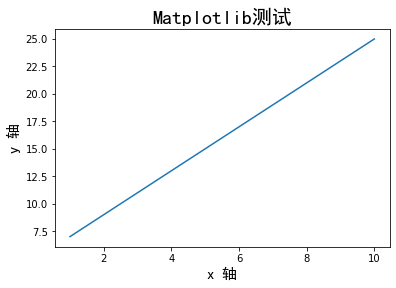

In [28]:
x = np.arange(1,11) 
y =  2  * x +  5 
plt.title("Matplotlib测试",fontproperties=heiti,fontsize=20) 
plt.xlabel("x 轴",fontproperties=heiti,fontsize=15) 
plt.ylabel("y 轴",fontproperties=heiti,fontsize=15) 
plt.plot(x,y)

类似于Matlab，我们通过参数修改线形、颜色：

|字符|描述|字符|描述|字符|描述|
|:----|:----|:----|:----|:----|:----|
|`-`|实线|`--`|段横线|`-.`|点划线|
|`:`|虚线|`.`|点标记|`,`|像素标记|
|`o`|圆标记|`v`|倒三角|`^`|正三角|
|`&lt`|左三角|`&gt`|右三角|`1`|下箭头|
|`2`|上箭头|`3`|左箭头|`4`|右箭头|
|`s`|正方形|`p`|五边形|`*`|星形|
|`h`|六边形1|`H`|六边形2|`+`|加号|
|`x`|X标记|`D`|菱形|`d`|窄菱形|
|`&#124`|竖直线|`_`|水平线|||

|颜色|描述|颜色|描述|颜色|描述|
|:----|:----|:----|:----|:----|:----|
|`b`|蓝|`g`|绿|`r`|红|
|`c`|青|`m`|品红|`y`|黄|
|`k`|黑色|`w`|白色|||

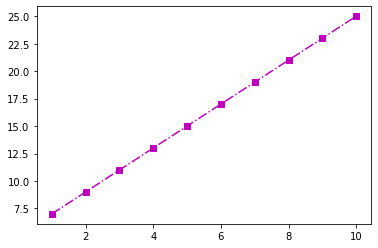

In [37]:
plt.plot(x,y,'-.sm') 

## pyplot.subplot

一张图分成多个格子

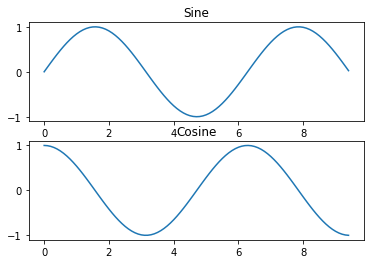

In [40]:
x = np.arange(0,  3  * np.pi,  0.1) 
y_sin = np.sin(x) 
y_cos = np.cos(x)  
# 建立 subplot 网格，高为 2，宽为 1  
# 激活第一个 subplot，并绘制第一个图像
plt.subplot(2,  1,  1)  
plt.title('Sine') 
plt.plot(x, y_sin) 
# 将第二个 subplot 激活，并绘制第二个图像
plt.subplot(2,  1,  2) 
plt.title('Cosine')  
plt.plot(x, y_cos) 

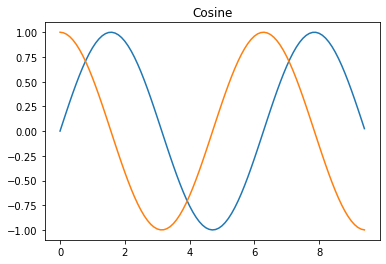

In [41]:
# 如果不使用subplot()函数，则所有的曲线会绘制在一张图上：
plt.title('Sine') 
plt.plot(x, y_sin) 
plt.title('Cosine')  
plt.plot(x, y_cos) 

## pyplot.bar

生成条形图

Text(0.5, 0, 'X axis')

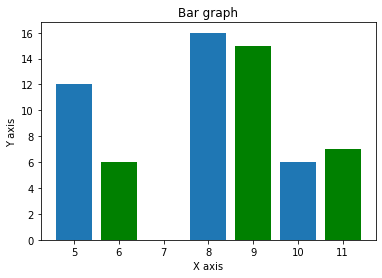

In [44]:
x =  [5,8,10] 
y =  [12,16,6] 
x2 =  [6,9,11] 
y2 =  [6,15,7] 
plt.bar(x, y, align =  'center') 
plt.bar(x2, y2, color =  'g', align =  'center') 
plt.title('Bar graph') 
plt.ylabel('Y axis') 
plt.xlabel('X axis')

## numpy.histogram/pyplot.hist 

**`numpy.histogram()`** 函数是计算数组在给定区间(**`bins`** 参数)上的频率分布

In [45]:
a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27])
np.histogram(a,bins =  [0,20,40,60,80,100]) 

(array([3, 4, 5, 2, 1], dtype=int64), array([  0,  20,  40,  60,  80, 100]))

<BarContainer object of 5 artists>

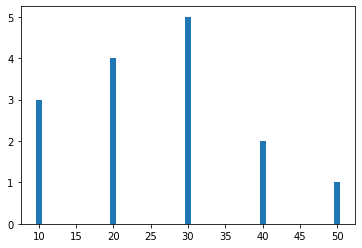

In [61]:
# 利用前述直方图函数bar绘出频率分布图
y,x=np.histogram(a,bins =  [0,20,40,60,80,100]) 
x1=x[1:]/2
plt.bar(x1, y) 

**`matplotlib.pyplot.hist`** 简化了上述步骤，而直接绘出频率分布直方图

(array([3., 4., 5., 2., 1.]),
 array([  0,  20,  40,  60,  80, 100]),
 <a list of 5 Patch objects>)

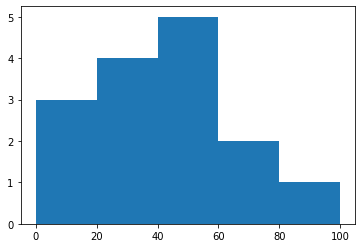

In [62]:
plt.hist(a, bins =  [0,20,40,60,80,100]) 

----